# Multimodal: Getting started Image + Text

In [ ]:
#Install these required dependencies to run this notebook
!pip install python-dotenv==1.0.0
!pip install requests
!pip install sseclient-py==1.8.0
!pip install pdf2image==1.17.0

In [14]:
import os
import sys

import json
from pprint import pprint
from IPython.display import HTML, display

current_dir = os.getcwd()
kit_dir =  current_dir
repo_dir = os.path.abspath(os.path.join(current_dir, ".."))

sys.path.append(repo_dir)

from dotenv import load_dotenv

load_dotenv(os.path.join(repo_dir, '.env'), override=True)

True

## Pass images to the Sambanova Multimodal Models

First you will need to instantiate the SambastudioMultimodal model wrapper, and set it with the desired parameters

In [ ]:
from utils.model_wrappers.multimodal_models import SambastudioMultimodal

lvlm=SambastudioMultimodal(
    model="Llama-4-Maverick-17B-128E-Instruct", 
    temperature = 0.01,
    max_tokens_to_generate = 1024,
)

### Using an image through an URL

You can pass directly an URL containing an image to the model wrapper as shown here

In [4]:
image_url = 'https://www.freeimageslive.co.uk/files/images005/skateboard-chicken.preview.jpg'
display(HTML(f'<img src="{image_url}" style="max-height: 300px;"/>'))

response=lvlm.invoke(
        images=image_url,
        prompt="what can you see in the image?"
        )

pprint(response)

('The image shows a chicken standing on a skateboard. The chicken is brown '
 'with a red comb and wattle, and it is standing on a black and white '
 'skateboard with red wheels. The skateboard is positioned on a gray concrete '
 'surface, and the background is a grassy field with fallen leaves. The '
 'overall atmosphere suggests that the chicken is enjoying the outdoors and is '
 'possibly being used as a prop for a photo shoot or other creative project.')


### Using a file path

You can pass the path of your image to the model wrapper as shown here

In [16]:
image_path = "data/sample_docs/sample.png"
display(HTML(f'<img src="{image_path}" style="max-height: 300px;"/>'))

response = lvlm.invoke(
    images=image_path,
    prompt="what is the title of the plot?"
    )

pprint(response)

'The title of the plot is "Number of Birds on a Tree vs Time of the day".'


### Using a Base 64 image

You are also able to sent to the model wrapper images encoded in base64, this can be useful when having in memory images


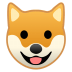

("The image depicts a cartoon-style illustration of a dog's head, "
 'characterized by its distinctive features:\n'
 '\n'
 '*   **Ears**: The dog has two triangular ears that are pointed upwards, '
 'giving it a friendly and alert appearance.\n'
 '*   **Eyes**: The eyes are large and round, with black pupils and white '
 'irises, conveying a cheerful and approachable expression.\n'
 '*   **Nose**: The nose is small and black, adding to the overall cute and '
 'endearing look of the dog.\n'
 '*   **Mouth**: The mouth is open, revealing a pink tongue and a wide, toothy '
 'grin, which suggests a happy and playful demeanor.\n'
 '*   **Background**: The background of the image is a solid green color, '
 'which provides a clean and simple contrast to the colorful and lively dog '
 'illustration.\n'
 '\n'
 'Overall, the image presents a lighthearted and joyful representation of a '
 'dog, likely intended to evoke feelings of happiness and friendliness in the '
 'viewer.')


In [6]:
b64_image="iVBORw0KGgoAAAANSUhEUgAAAEgAAABICAMAAABiM0N1AAAACXBIWXMAAA7EAAAOxAGVKw4bAAADAFBMVEVHcEzvqTrupTbxqzzSkE7wqjvupjf+9+AAAAD+67LtpDTsozPzsELroC/89d71tEb2tkj28NnUkk/nmCf+gYHlliOueTzTkU7TkU6wfT66gUHUkU7UkU7WlE/uqkLUkk/enk/7wFbTkU6UaDSvez7Ukk7UklDTkU7Vk03jnkL43q7IiUjTkUvQkE3TkU7rrFG4f0XVlUrjok3TkU7amU/mp1HOkUnQj01eQBJlRRTnp07UklDiok/Zl07ToWzhoFHan0rTkk8+PTjUkk7WlE7UkU6Tj4FfXVixekL2tkzZnU7hoU9iMjIxMCz+6rCYTU2fbSKTZB7ckyg7KAvHiClzThfXlk7qzqVycW3q0ars38XWzLTRj03+67H56s0EAgFRT0jPaWk7EOLy7EP/+OHqni7TkU8AAADvqDjyrD7/7LP0sUPyrj/sojLzr0D4t0rmlyX1skT58tzr5dD3tUf07dfy69XllSPu6NLjkR74uUvp483nmCfkkyHpnSzwqjr8wFPomyrpnCvtpDP/goLm4Mvj3cnYlk7roC8XFxbg28bOybbb1cHQy7j6vE//9+AtLSz+9t7W0b3Y0783NzdVVVVCQkDd2MTxqzzvpjfupTbUz7vWlE7SzblLS0siIiLUl1kODQz38NnamU/4uVB9em7rpUHh0LL6xGH7vlH2tEb65LvyxoL+9NnnnTXnpk3Vml0dEQkdHBrDvq0pGwdSNw/YlEnrqkzemEHXnmLaoWb6zHUFAgLHwrEJBwb+4p7LxrOhnZDTlFTssly+uanlxJr4xGX0uFPxs1ELCglnZFv+6a3SuZeFgnbPv6X11Z/87Mr56crwv3LenU771IP+5aUkFBPRvp/83ZYkIyDQroXcyamaloj0zZD3wF/+gYHSpXT7yWr+6KrmdXW9X191ThXWjiWIXR18UhWtdCDmv5Dw1rG2saHtsFXVtY2AQUHaqnTjo1GzW1v2fHy6gCi5gCj98tb+67Leu5D+6rA8Hh54PT3PaWlHcEzjsQDwpuBYd+XqAAABAHRSTlMA/v7+/v7+/v7+/v7+///+/v7+/v7+EOz4CSGTnPH+1qL+0QMXpsqIe/7+T2FH5f4vUf6001E8aP7+Yd1r5v6SJa/+usJ2/v4+/jN//v7+/v7+/v7+/vn+/v7+/lj+/v7+/v7/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////AP/+1Ae1twAABvhJREFUWMPVmHdUU1ccx1GfJhEQDCtCiEDYKggoaBFQnLj3bEt7DlxaEJVaR2NFQAGxNghWO4xtkF32Xo0M2Xsp7r336G7/6H0reYNItP+0n3N+7/zu9/7e9928vHfvuU9L67/LVAufhW92xkIfi6lsdQZAEL7POM1txlnwEQTMYMnmsqYnyWDKTE19Zk4Byc1NMnPmpScA54gIyxfAfKqGN8IcvLCMiHAGkxgd9qA5AuLM5y/SxGcR4Duj9c3AntEjBCmZKM2xwGLIGyW2ALFNWHkTMGP0zQLSzBvV/RGZKclgjvEQRhYgGV62v7oqUwpsGH2z+VJpNS+4OkOa0oeobrnY1N3lHYiLu6mY1IxRH6nl+WBeGzSazTCylUmlS3mw74Y0xRWYL7KGJ0z1mbIWPhQIGghYO8ViBryA9QwvJNlPmnEWFvMspbI5DCMrmUTKQ/uW3pBIyviA7+WFPiaxfa55eWV5eXmufbHQD5h7wS5XP0nGTaw4QyKzZRiNj5VYYn28PzIkEr+8ZJks2bXMT0LBrzmvD6p5ULSEPmhxo0RmxTLamhKMc1aydSjOE6WNW2PZRvop+IiCeVf19T/Vx4OekK0UopDXqM8akZVM3480atTY6CrbyFamp78U72/z09P7UQ8PeqJsVRNGlnqsf22OLCysDf/hVWFD0vgbXpoSxnqO3EBICPZo8PpDNKAKH5FeCJjFMLIBOjrnYd97VSE6kBAi6Aml1dgGi2/q6LBeESEQbennBZ+9ukVDmuB9Or9FxHpp7YBos19Vo85mjdG5WtW0WQTsWPNR2sdvQRqYyzDyAGkjRoz4hgg1CVtOAxNZU63DyJEj9xGhJmHLDmACw2gBcBg2bNg+ItQkbNkBTGYYWYPyj96CcsCaTU1KR40a9S0RahK2XGrC9DEWlA4fPvw7ItQkbLlUwBzRROAwevTo/USoSdiyA+tfswG52tra+4nQ/nn6tOWh2lQFO4Qunzb9F5rMekWcSkMp3AuClOiGMtAtQfV7VKnUie5jCsp1IQfxWO0fxOVyg1aoFPywApP9V1PkcmBKfx6R8kDIQTzWcLEzVqkU/LAKk7lrKHI54kJ/1ZDcQF2RKDQQowQ3KghkUIAbleCtUJFINzAXoS/+QqTXMYfDScjqDQwPD5+OGxWHMyjGjabDNLA3K4HDyXHsRYSMCTIhACcrLSrqQRDGnSgGd3D9QVRUWhZRngDc6HO/PJ4DCYDRnRYZWYJeunhlJIOVxeiISiIj07qJYk5APn2pHV8RQBoFZEUaGNwvLph21wDyORH44e60guL7BgbhWQFKo4rxNCNPihEnm3G+yohoZXNURpWezBGp+DV322vJzaEUM0Zkmx+vGhEn22ibkREW9IRoZXMoI2LcIzf+GIpRj9EueAYa9IRodVOMEvj0hc0M6aEYccr2kmw7c2VDevq6K867lFIZpZDTg9DXIw/kEdWoizzpTLdi/THIekWWM6l1UY0eIfR5ZDJ4SLmBAfFnPkPZeyW+9hhBbUL2Xkw8E0+tfMiYtMUmldQRcXJQp1xHTtH3Soo4jrlQfJJDK6x0Yk1s70M5ngh4cMzugqfMP65kPrTvynYk+/HoAULWutYwhk3MVxRiBiloYG0hxCYVn7A5eoTCYXb/qXxPMXMZsUM2jB17aiweZLLD9wclvjvY/euQuaxtgbWgcucOgnk1ZFZfGEdQ+JjUai6T2c4Kk0F2G3ZIw06C+Un1ZFq/JAnjwmNSKUpqJdOGQQYEl0gn+cbdOCdOx9UQ6e49tR9cKPTtiCHbJ+NOJxLpxjrPQTdS74Ln2wlag+KKtg+KojColcyfs/4ycquFNOzBOZHEbUmNIRpFly/XEGlMRws3KZFo/I6YqdmGGXvWpUfjpMI5NS5VER196PISdCXwrT0cHV2TWgjlDqLkErBSt0MULxTI02MwDh1Blwtu3IVzi5fd/vvD28sWn7sQh0lLDuEV6XUmpuq3hi5IfvohjPoWdL1IenntAMG1Z9gK0lKP96fLBe6v22R6QKevMeahlz9neMDQEAvDA8uwNW0e3ntJLpj0+u2qByK/dBgjFRr531IZLUaNUvG+gbqhfOBDIKhrP4qR6s/lPlMa3ToNfVOxjsSnfBP3obf07k7I9U2JKLVxXP/bhNGrP+Gtr8XkTd6IlakmHwesZwN5+wkURWvST3/dgvf71ctzQUmtCkx8WgeEmn5C8TAH3p0nURQdxwsLCgpaCo93KDBhoAI4uWj8IUZsbYMg3gNf4tQUFdUQabs3IjAz1noTJrshIP9i5xcUOi/KgUBoqvWmTDYzAUB+/WL7QGfnQPvF63IAnOze3Ab7pjRB6Kn8EoGMN5sk/hcfzKwXeNjb2dlPXGCs9X/jHzMYd+WLYIc6AAAAAElFTkSuQmCC"
display(HTML(f'<img src="data:image/png;base64,{b64_image}" style="max-height: 300px;"/>'))
response = lvlm.invoke(
    images=b64_image,
    prompt="which animal is in the image?"
    )
pprint(response)

### Use Streaming

In [7]:
image_url = 'https://img.freepik.com/free-photo/close-up-dressed-up-chicken_23-2150741637.jpg'
display(HTML(f'<img src="{image_url}" style="max-height: 300px;"/>'))

response=lvlm.stream(
        images=image_url,
        prompt="what can you see in the image?"
        )

for chunk in response:
    print(chunk, end="")

The image shows a chicken wearing sunglasses on a beach. The chicken is standing in the foreground, facing the camera, and is the main focus of the image. The chicken has a light-brown body with darker brown feathers around its neck and a red comb on top of its head. It is wearing red-framed sunglasses with blue lenses that reflect the photographer's face. The background is out of focus, but it appears to be a beach with sand, water, and a blue sky. The overall atmosphere suggests a fun and playful scene, with the chicken looking directly at the camera as if it is posing for a photo.

## Prompting your model to perform specific tasks

For some specific task you can do some prompt engineering in order to improve the quality if the model responses

In [14]:
image_url="https://cdn4.picryl.com/photo/2010/01/01/american-vintage-cars-line-up-near-the-havana-cuba-capitol-and-chinatown-in-3-1024.jpg"
display(HTML(f'<img src={image_url} style="max-height: 300px;"/>'))

In [18]:
response = lvlm.invoke(
    images=image_url,
    prompt="How many cars are in the image?"
    )
pprint(response)

'There are ten cars in the image.'


In this case we can se an hallucinated output 
Now lets prompt the model to think step by step and perform as an expert counting system

In [20]:
count_prompt = ("You are an expert counting system, " 
                "How many cars are in the image? " 
                "think step by step in and analyze every part of the image Before providing the answer "
                "you must finalize with Answer:<count>")

response = lvlm.invoke(
    images=image_url,
    prompt=count_prompt
    )

pprint(response)

('1. Start from the left side of the image.\n'
 '2. Identify the first car (white car).\n'
 '3. Move to the right and identify the second car (maroon car).\n'
 '4. Continue to the right and identify the third car (green car).\n'
 '5. Continue to the right and identify the fourth car (blue car).\n'
 '6. Continue to the right and identify the fifth car (light blue car).\n'
 '7. Continue to the right and identify the sixth car (blue car).\n'
 '8. Continue to the right and identify the seventh car (red car).\n'
 '9. Continue to the right and identify the eighth car (brown car).\n'
 '10. Continue to the right and identify the ninth car (brown car).\n'
 '\n'
 'Answer: 9')


We can see the model now is "thinking" identifying each car before giving a final count

This technic is also useful in cases when you need plot and chart understanding

In [17]:
image_path = "data/sample_docs/sample.png"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

In [28]:
response = lvlm.invoke(
    images=image_path,
    prompt="how many birds have been seen before 7am?"
    )
pprint(response)

('Before 7 AM, the graph shows a data point at 6 AM. At 6 AM, the number of '
 'birds seen is 30. Therefore, 30 birds have been seen before 7 AM.')


Lets ask the model again to perform with a different role and thinking step by step

In [27]:
response = lvlm.invoke(
    images=image_path,
    prompt="You are an expert chart and plot reader think step by step before giving an answer to the following question: how many birds have been seen before 7am?"
    )
pprint(response)

('To determine how many birds have been seen before 7am, we need to look at '
 'the data points on the graph that correspond to times before 7am. \n'
 '\n'
 '1. Identify the x-axis, which represents the time of the day.\n'
 '2. Locate the point on the x-axis that corresponds to 6AM.\n'
 '3. Observe the y-axis value at 6AM, which represents the number of birds '
 'seen at that time.\n'
 '\n'
 'From the graph:\n'
 '- At 6AM, the number of birds seen is 20.\n'
 '\n'
 'Therefore, the number of birds seen before 7am is 20.')


## Prompting the model with image reference

This is a typical call to the model in which we pass an image and the query as a text prompt

In [18]:
image_path = "data/sample_docs/sample2.jpg"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

response =  lvlm.invoke(
    images=image_path,
    prompt="whats the function of the mitochondria?"
    )

pprint(response)

('The mitochondria are the powerhouses of the cell, responsible for generating '
 "most of the cell's supply of adenosine triphosphate (ATP), which is used as "
 'a source of chemical energy.')


But we can also highlight or underline information in the image combined with the prompt to get specific responses 

In [20]:
image_path = "data/sample_docs/sample2highlight.jpg"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

response = lvlm.invoke(
    images=image_path,
    prompt="whats the function of the highlighted organelle"
    )

pprint(response)

('The highlighted organelle is the mitochondria. The mitochondria are the '
 "powerhouses of the cell, responsible for generating most of the cell's "
 'supply of adenosine triphosphate (ATP), which is used as a source of '
 'chemical energy. In addition to supplying cellular energy, mitochondria are '
 'involved in a range of other processes, such as signaling, cellular '
 'differentiation, cell death, as well as the control of the cell cycle and '
 'cell growth.')


We can even ask the question directly in the image 

In [21]:
image_path = "data/sample_docs/sample2question.jpg"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

response = lvlm.invoke(images=image_path)
pprint(response)

('The cell diagram shows a cell with various organelles labeled. The organelle '
 'that is not labeled is the **vacuole**.\n'
 '\n'
 '*Answer*: Vacuole')


## Transcribing and structuring documents

The SambaNova multimodal models can be used also to transcribe text and tables from documents 


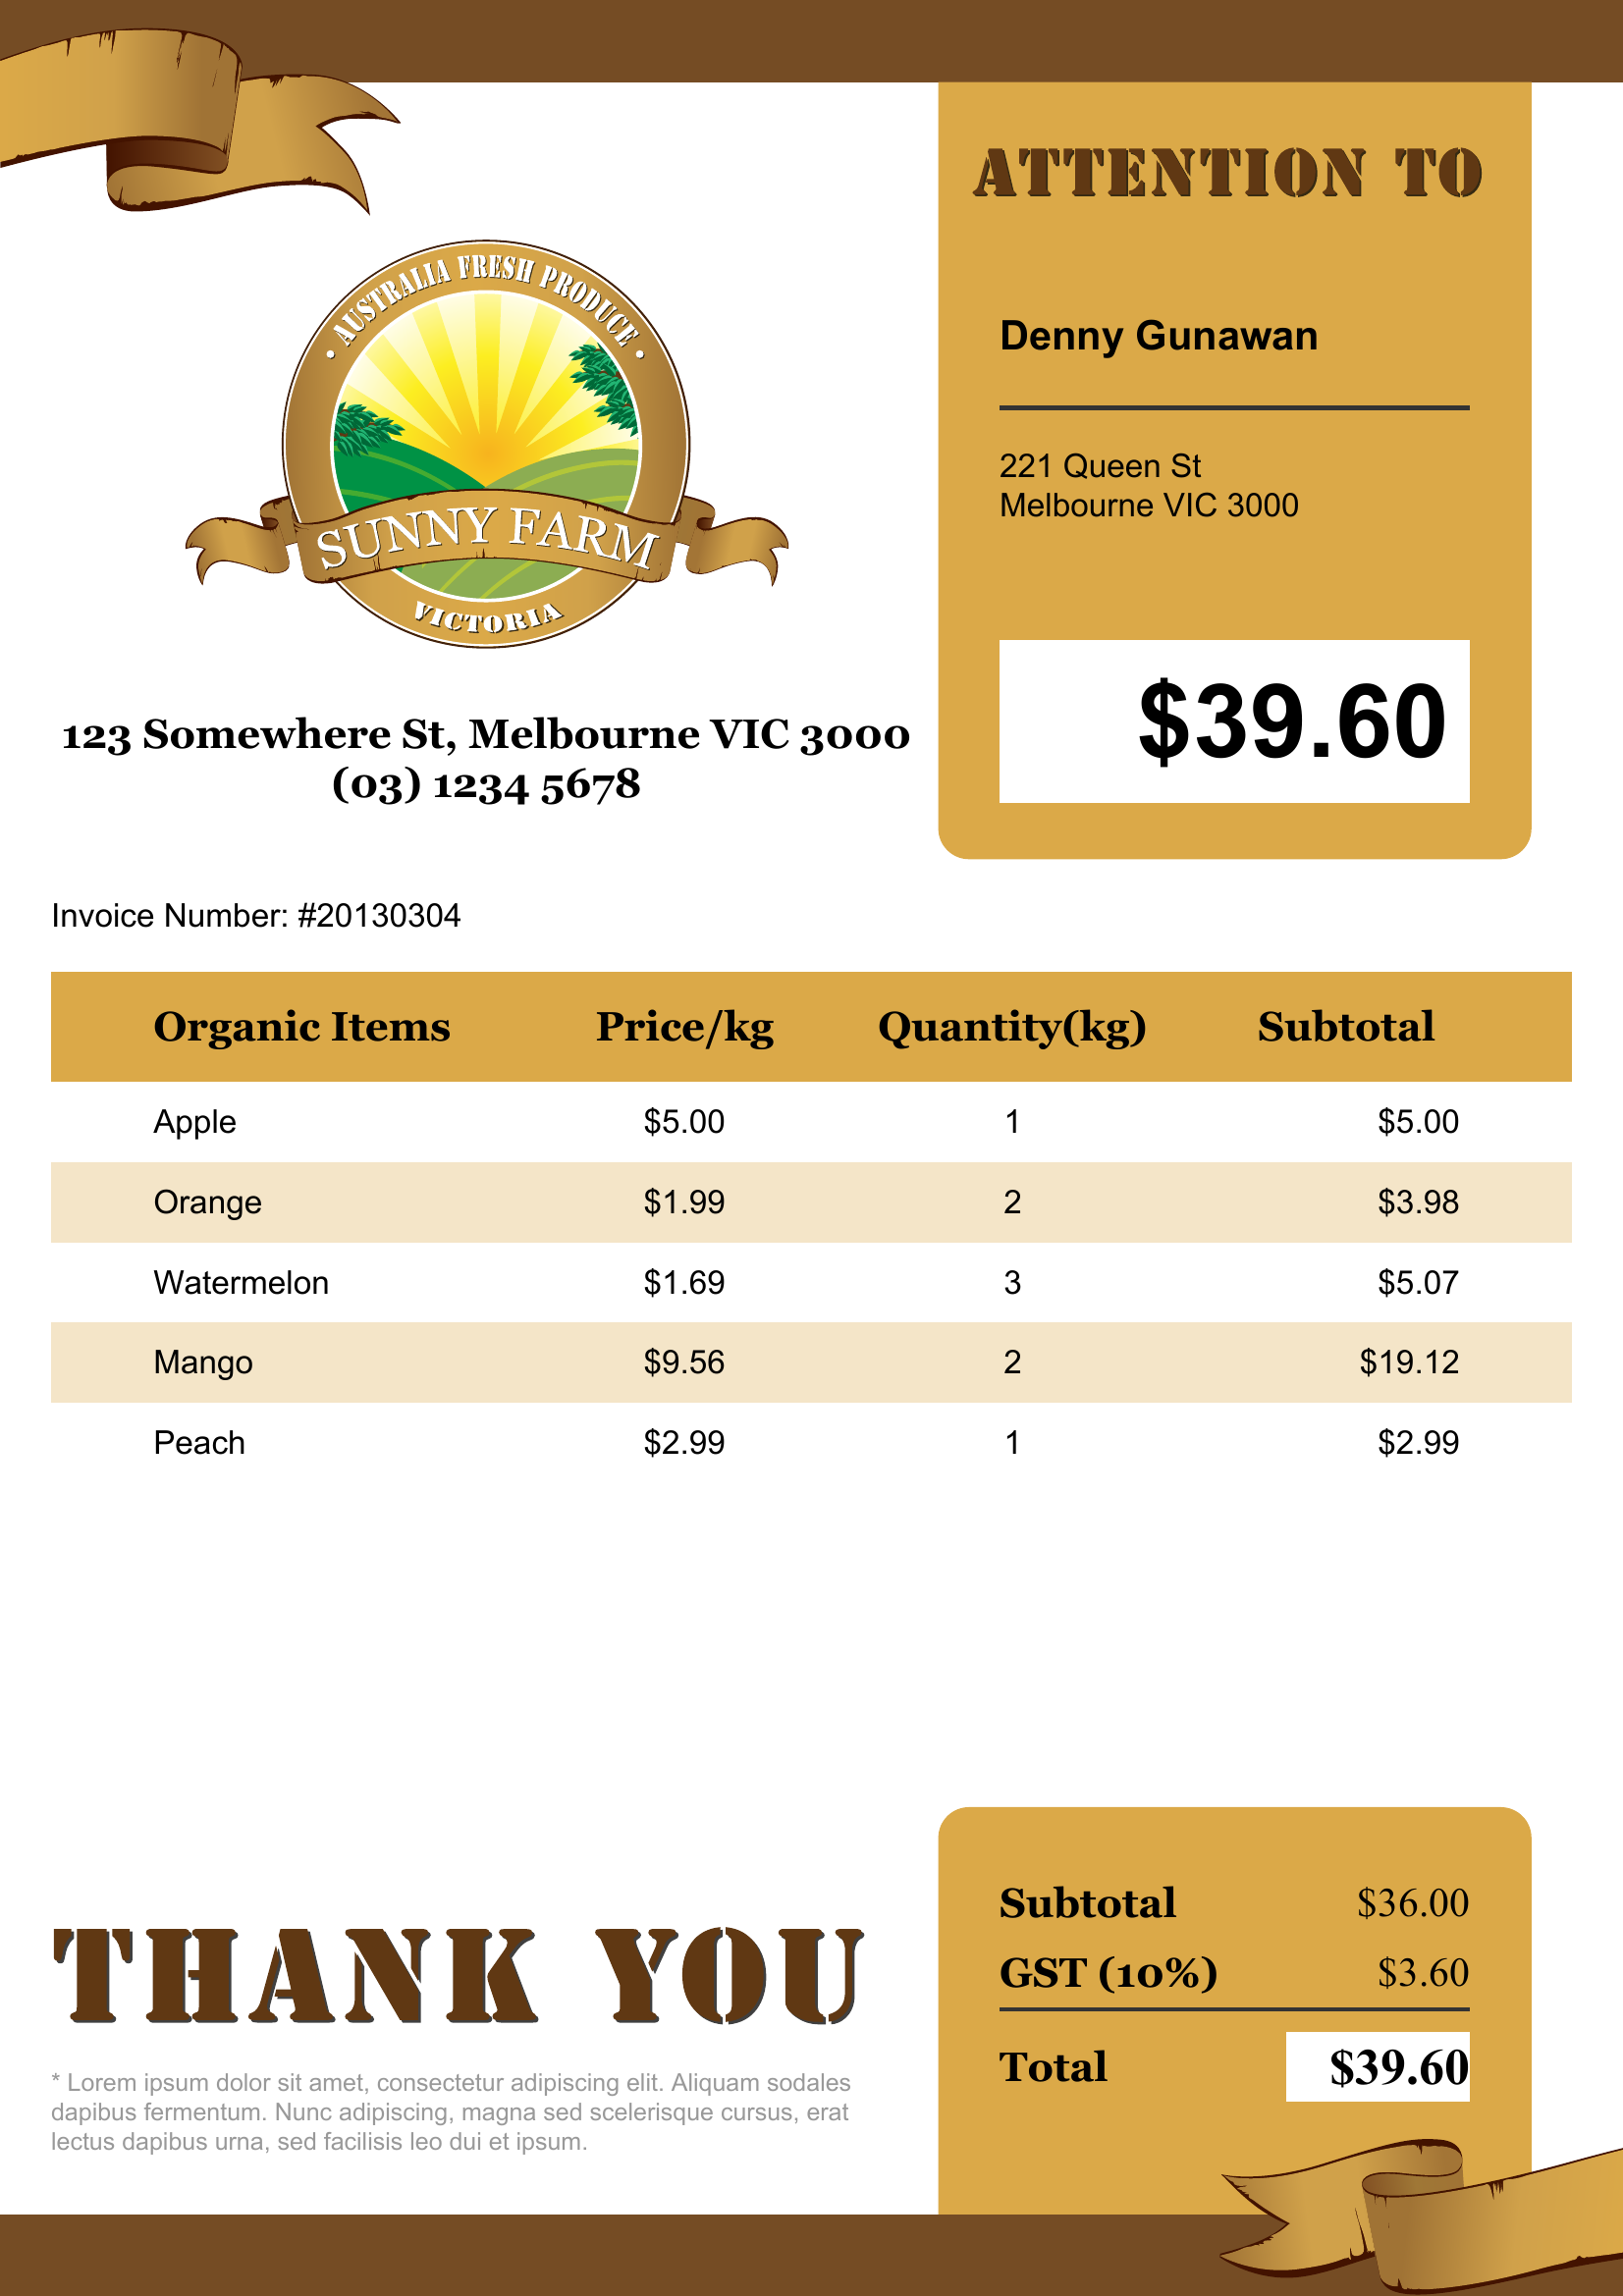

In [10]:
# load PDF document as image in memory
from pdf2image import convert_from_path
import base64
from io import BytesIO

images = convert_from_path(os.path.join(kit_dir,"data/sample_docs/invoicesample.pdf"))

# get first page and convert the image to base64
image = images[0]
buffered = BytesIO()
image.save(buffered, format="PNG")
b64_img = base64.b64encode(buffered.getvalue()).decode()

display(HTML(f'<img src="data:image/png;base64,{b64_img}" style="max-height: 450px;"/>'))

In [48]:
response = lvlm.invoke(
    images=b64_img,
    prompt="transcribe the text in the image"
    )
pprint(response)
       

('ATTENTION TO\n'
 '\n'
 'Denny Gunawan\n'
 '\n'
 '221 Queen St\n'
 'Melbourne VIC 3000\n'
 '\n'
 '$39.60\n'
 '\n'
 '123 Somewhere St, Melbourne VIC 3000\n'
 '(03) 1234 5678\n'
 '\n'
 'Invoice Number: #20130304\n'
 '\n'
 '| Organic Items | Price/kg | Quantity(kg) | Subtotal |\n'
 '|---------------|----------|--------------|----------|\n'
 '| Apple         | $5.00    | 1            | $5.00    |\n'
 '| Orange        | $1.99    | 2            | $3.98    |\n'
 '| Watermelon    | $1.69    | 3            | $5.07    |\n'
 '| Mango         | $9.56    | 2            | $19.12   |\n'
 '| Peach         | $2.99    | 1            | $2.99    |\n'
 '\n'
 'THANK YOU\n'
 '\n'
 '* Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam sodales '
 'dapibus fermentum. Nunc adipiscing, magna sed scelerisque cursus, erat '
 'lectus dapibus urna, sed facilisis leo dui et ipsum.\n'
 '\n'
 '| Subtotal | $36.00 |\n'
 '|----------|--------|\n'
 '| GST (10%)| $3.60  |\n'
 '| Total    | $39.60 |')


We can even ask the model to transcribe some structured documents like forms

In [14]:
image_url = 'https://global.discourse-cdn.com/bubble/original/3X/4/a/4adf3c255f411eaba5bbd1cf2bcd2da5e7ec919d.jpeg'
display(HTML(f'<img src="{image_url}" style="max-height: 300px;"/>'))

response = lvlm.invoke(
    images=image_url,
    prompt="transcribe the form in the image the output shoud be in json format including each field as key: value.\n the output must follow this format\n  ```json\njson```\n\ndo not provide any explanation. "
)
print(response)

**JSON Output:**

```json
{
    "FakeDoc M.D.": {
        "HEALTH INTAKE FORM": {
            "Date": "9/14/19",
            "Name": "Sally Walker",
            "DOB": "09/04/1986",
            "Address": "24 Barcy Lane",
            "City": "Towaco",
            "State": "NJ",
            "Zip": "07082",
            "Email": "Sally.Walker@cmail.com",
            "Phone #": "(906) 917-3486",
            "Gender": "F",
            "Marital Status": "Single",
            "Occupation": "Software Engineer",
            "Referred By": "None",
            "Emergency Contact": "Eva Walker",
            "Emergency Contact Phone": "(906)334-8926",
            "Describe your medical concerns (symptoms, diagnoses, etc.)": "Runny nose, mucas in throat, weakness, aches, chills, tired"
        }
    }
}
```


we can after perform a basic parsing to access to the form fields

In [20]:
def parse_json(str_input):
    json_response = str_input.split("```json")[-1]
    json_response = json_response.replace("```","")
    json_response = json_response.strip()
    return json.loads(json_response)

In [24]:
form = parse_json(response)
form.get("FakeDoc M.D.").get("HEALTH INTAKE FORM").get("Date")

'9/14/19'

## Advanced use cases
You can find an extra advanced used case in the [multimodal Enterprise knowledge retriever kit](../multimodal_knowledge_retriever/README.md) in this kit you will find a Retrieval augmented generation application leveraging SambaNova's multimodal models